<a href="https://colab.research.google.com/github/Neeraj70820/My-Notes/blob/MLT-Notes/MLT_wk_7_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt 



In [ ]:
(train_X,train_y), (test_X,test_y)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


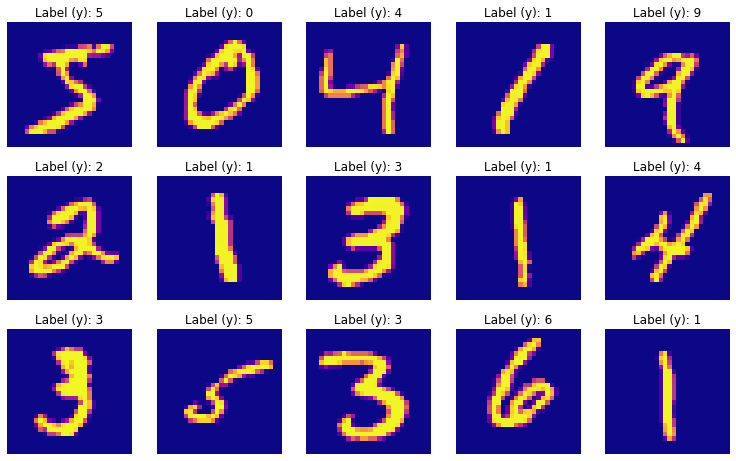

In [ ]:
plt.figure(figsize=(12.94442719,8))
for i in range(15):
  plt.subplot(3,5,i+1) 
  plt.imshow(train_X[i],cmap='plasma') 
  plt.title('Label (y): {}'.format(train_y[i]))
  plt.axis('off')


plt.show()


In [ ]:
X_train =train_X.reshape(train_X.shape[0],28*28)#flatten the $28 X 28 matrix into 784 column
X_train.shape
X_test =test_X.reshape(test_X.shape[0],28*28)

#Each pixel values between 0 to 255. We scale each value by dividing by 255 

X_train = X_train/255 
X_test = X_test/255

for softmax regression, label vector **y** need to be represented in **one-hot encoding

In [ ]:
def convert_to_one_hot_encoding(y,k):
  # A zero matrix of size (m,k)
  y_one_hot = np.zeros((len(y),k))
  # print(y_one_hot)

  #Putting 1 for column where the label is using multidimensional indexing 
  y_one_hot[np.arange(len(y)),y]=1
  return y_one_hot

In [ ]:
y=[1,0,2,0,3,0,0,4]
np.eye((len(y)))[y]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
y=['b','a','c','b','a','a']
y_unique =list(set(y))
y_sort=sorted(y_unique) 
for i in range(len(y)):
  y[i]=y_sort.index(y[i])

print(y)
  


[1, 0, 2, 1, 0, 0]


In [ ]:
convert_to_one_hot_encoding(y,3)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Softmax Regression Implementation

In [ ]:
def linear_combination(X,w,b):
  return X@w +b

In [ ]:
def softmax(z):
  #subtracting the max of z for numerical stability.
  exp = np.exp(z - np.max(z))
  for i in range(len(z)):
    exp[i]/= np.sum(exp[i])

  return exp


In [ ]:
def fit(X,y,lr,c,epochs): # c = no of classes in classification problem
  n,m = X.shape
   # initializing weights and bias randomly
  w = np.random.random((m,c))
  b = np.random.random(c) 

  losses= [] 

  for epoch in range(epochs):
    z = X@w + b 
    #Calculating hypothesis/prediction
    y_hat = softmax(z)
    #converting one hot encoding
    y_hot = convert_to_one_hot_encoding(y,c)
    
    #Calculating the gradient of loss w.r.t w and b
    w_grad =(1/n)*np.dot(X.T,(y_hat - y_hot ))
    b_grad = (1/n)*np.sum(y_hat - y_hot) 

    #Updating the parameters 



    w = w - lr*w_grad
    b = b - lr*b_grad 

    loss = -np.mean(np.log(y_hat[np.arange(len(y)),y])) 

    losses.append(loss)

    #Printing out the loss at every 100th iteration.

    if epoch%10==0:
      print("Epoch : {epoch}==> Loss = {loss}".format(epoch=epoch,loss=loss))

  return w , b , losses

In [ ]:
y=np.array([[1,2,1,3]])
y[np.arange(len(y)),y]

z = np.zeros((4,4))
z[np.array([0, 1, 2, 3]),y]=1
z



array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
def predict(X,w,b):
  z = X@w + b 
  y_hat = softmax(z)
  return np.argmax(y_hat, axis=1) 


def accuracy(y,y_hat):
  return np.sum(y==y_hat)/len(y)
  

In [ ]:
#Training 
w,b, loss = fit(X_train,train_y,lr=0.9,c=10,epochs=100)

Epoch : 0==> Loss = 4.7350009536792825
Epoch : 10==> Loss = 1.1188972406820732
Epoch : 20==> Loss = 0.6764225131515494
Epoch : 30==> Loss = 0.5648095639169842
Epoch : 40==> Loss = 0.5163950260197772
Epoch : 50==> Loss = 0.48470418886118416
Epoch : 60==> Loss = 0.46189753794077976
Epoch : 70==> Loss = 0.44447392889755816
Epoch : 80==> Loss = 0.43059207056877624
Epoch : 90==> Loss = 0.41918475716447406


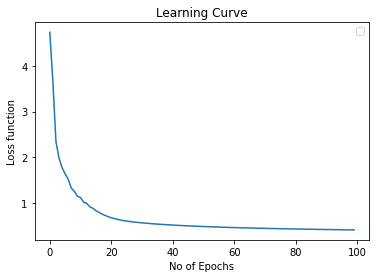

In [ ]:
#Learning curve 

plt.figure() 
plt.title('Learning Curve')
plt.legend('Training Epochs') 
plt.xlabel('No of Epochs')
plt.ylabel('Loss function')
plt.plot(np.arange(len(loss)),loss)
plt.show()

In [ ]:
#Accuracy for test set 
test_preds = predict(X_test,w,b) 
print('Accuracy for test set:',accuracy(test_y,test_preds))

Accuracy for test set: 0.888


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 



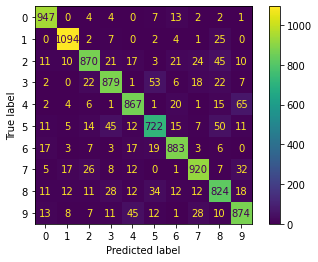

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(test_y, test_preds)
cm_display

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.96      0.96      1135
           2       0.90      0.84      0.87      1032
           3       0.87      0.87      0.87      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.81      0.83       892
           6       0.90      0.92      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.82      0.85      0.83       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='micro'))
print('precision score :', precision_score(test_y,test_preds, average='micro'))
print('recall score :', recall_score(test_y,test_preds, average='micro'))

F1 score : 0.888
precision score : 0.888
recall score : 0.888


In [ ]:
print('F1 score :', f1_score(test_y,test_preds, average='macro'))
print('precision score :', precision_score(test_y,test_preds, average='macro'))
print('recall score :', recall_score(test_y,test_preds, average='macro'))

F1 score : 0.8862884538542799
precision score : 0.8865169085521666
recall score : 0.8864686155290231


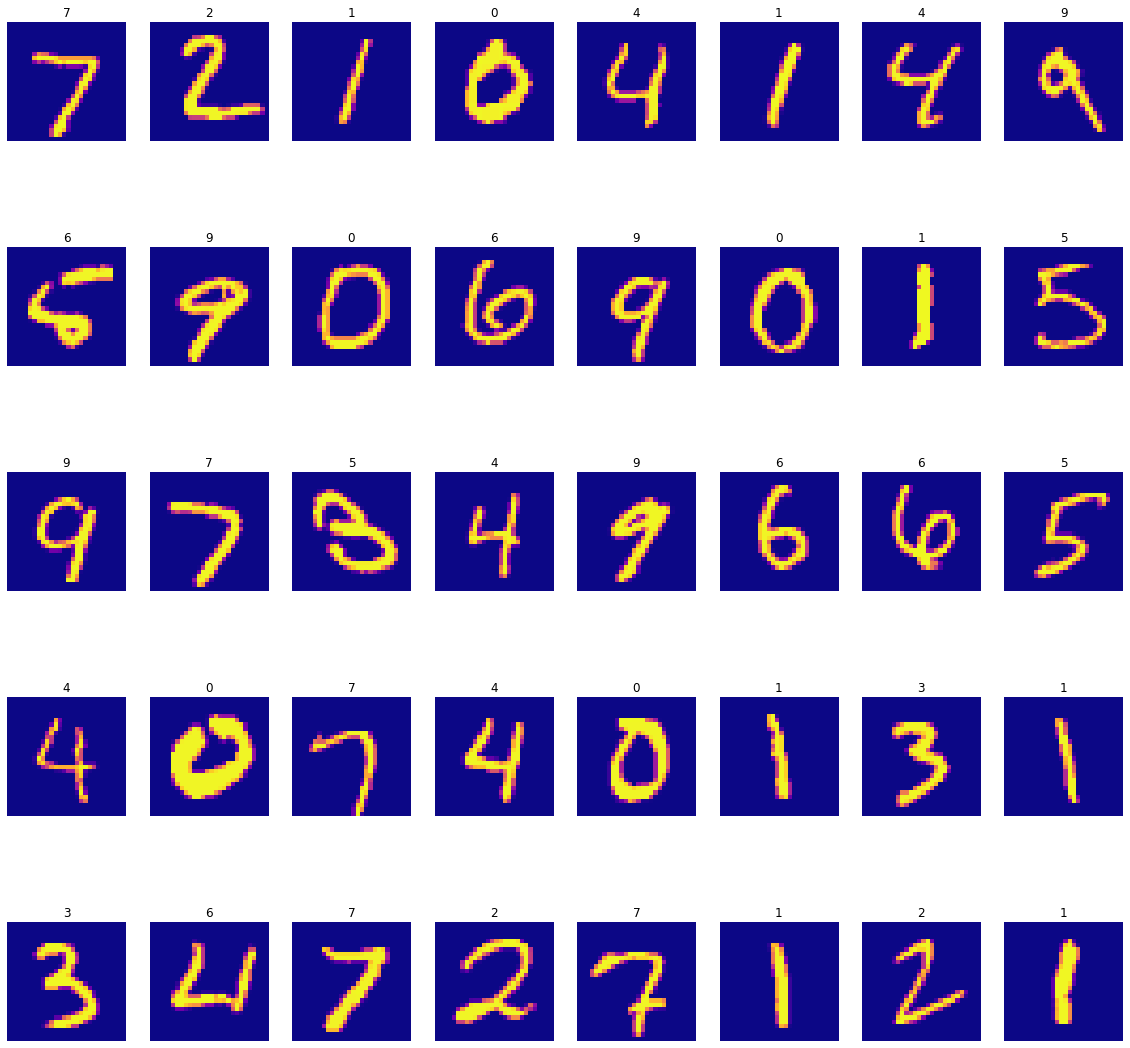

In [ ]:
plt.figure(figsize=(20,20))
for i in range(40):
  plt.subplot(5,8,i+1)
  plt.imshow(test_X[i],cmap='plasma')
  plt.title(test_preds[i])
  plt.axis('off')
plt.show()

#K NN 

In [ ]:
 from IPython.display import display, Math, Latex 

 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.style.use('seaborn')

 from scipy import stats 
 from sklearn.datasets import make_classification, make_blobs 
 from sklearn.model_selection import train_test_split 




DIstance computation 

In [ ]:
def EuclideanDistance(x1,x2):

  dist = np.sum((x1-x2)**2,axis=1)
  return dist

def ManhattanDistance(x1,x2): 
  np.sum(np.abs(x1-x2),axis=1)

#KNN Implementation 

Let's implement KNN class.


In [ ]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,task_type="Classification"):
    self._k = k 
    self._distance_metric = distance_metric 
    self._task_type = task_type 
  
  def fit(self,X,y):
    #fitting model on data only requires copying the data
    self._X = X 
    self._y = y 
  def predict(self,newExample):

    #newExample is example for which prediction has to be made.
    ''' label: predicted label for newExample
    k_nearest_neighbours_indices : indices of the nearest k neighbours

    '''
    #2. calculate the distance between the new example and every example from 
    # data. Thus create a distance vector.

    distance_vector = self._distance_metric(self._X,newExample)

    # Get indices of nearest k neighbours

    k_nearest_neighbours_indices = np.argpartition(distance_vector,self._k)[:self._k]
    #4 Get the labels of the selected k entries.
    k_nearest_neighbours = self._y[k_nearest_neighbours_indices]
    # If it is a classification task, return the majority class by computing mode 
    #the k labels
    if self._task_type == 'Classification':
      label = stats.mode(k_nearest_neighbours)[0] 
    else:
      label = k_nearest_neighbours.mean() 
    
    return label, k_nearest_neighbours_indices 

  def eval(self, X_test,y_test):
    if self._task_type == 'Classification':
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:])
      error = np.mean(y_test==y_predicted, axis = 0)
    
    else:
      y_predicted = np.zeros(y_test.shape) 
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(X_test[i,:]) 
        error_vector = y_predicted - y_test 
        error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error
    



Classification

Example 1: Simple decision boundary 

Let's generate 100 points, each represented with two features and a class label. This dataset is generated for **classification task** 
  The points are genrated such taht they are clustered in two groups with means $[0,0] and [5,5]$ with standard deviation 1. 

In [ ]:
# Genrate artificial data points
X,y = make_blobs(n_samples = 100,
                 n_features =2,
                 centers = [[0,0],[5,5]],
                 cluster_std = 1,
                 random_state=12) 


In [ ]:
# Let's check shapes of feature matrix and label vector 
print("Shape of feature matrix:", X.shape) 
print("Shape of label vector :", y.shape)

Shape of feature matrix: (100, 2)
Shape of label vector : (100,)


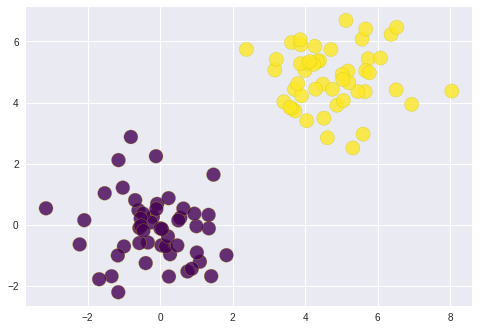

In [ ]:
#plot the two classes 
plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=200,edgecolor='y', alpha=0.8,cmap='viridis')
plt.grid(True)
plt.show()

Let us apply KNN technique and visualize how a new example is assigned a label. For this example value of **k** is set to be 3.


In [ ]:
newExample = np.array([2.2,2.2]) 

#initialize  a model with k=3 and euclidean distance as distance metric 

model = KNN(3,distance_metric=EuclideanDistance) 

model.fit(X,y)  

#get the predicted label and indices of nearest k neighbours 
prediction , k_nearest_neighbours_indices = model.predict(newExample.reshape(1,2)) 



Let's visualize the new example along with training examples.


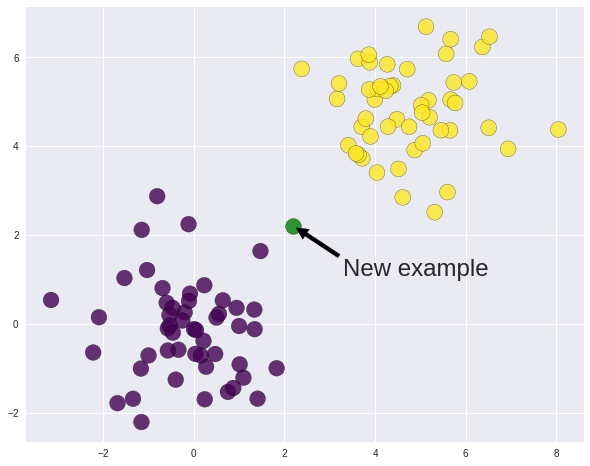

In [ ]:
plt.figure(figsize=(10,8)) 
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=250,edgecolor='k',alpha=0.8, cmap='viridis') 
plt.scatter(newExample[0],newExample[1],marker='o',c='green',s=250, edgecolor='k',alpha = 0.8)
plt.annotate('New example', xy=newExample, xytext=(50,-50),textcoords='offset points',arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)

plt.show()

find nearest 3 neighbours.

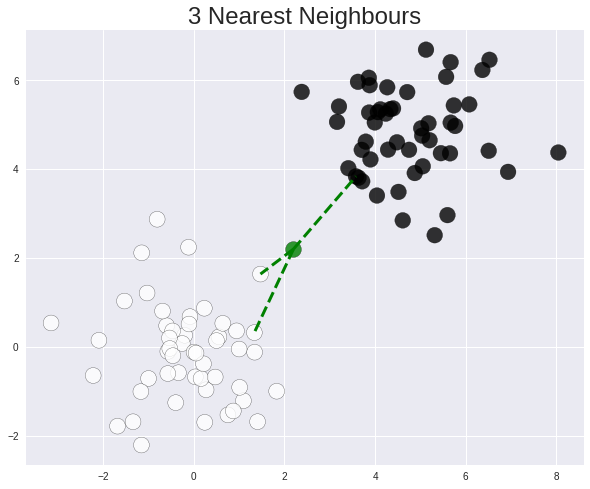

In [ ]:
plt.figure(figsize=(10,8)) 
plt.grid(True) 

plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=250, edgecolor='k',alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',c='green',s=250,edgecolor='k',alpha=0.8) 

for xi in X[k_nearest_neighbours_indices]:
  plt.plot([newExample[0],xi[0]],[newExample[1],xi[1]],'g--',linewidth=3)

plt.title("3 Nearest Neighbours", fontsize=24) 
plt.show()

Label the new point with majority class out of 3.

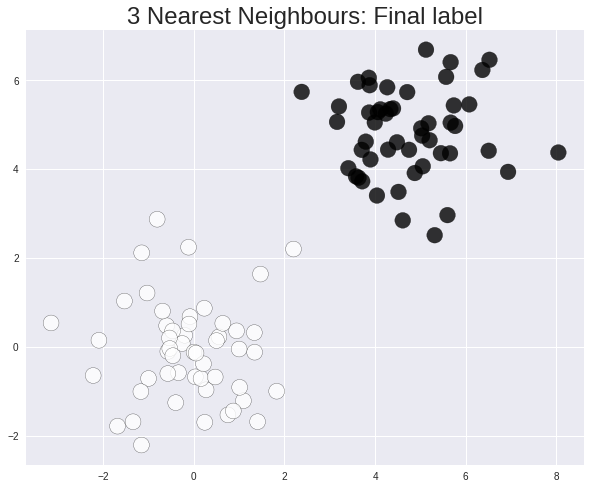

In [ ]:
plt.figure(figsize=(10,8)) 
plt.grid(True) 
tx = np.concatenate((X,newExample.reshape(1,2)),axis=0)
ty = np.concatenate((y,prediction),axis = 0) 
plt.scatter(tx[:,0],tx[:,1],marker='o',c=ty, s = 250, edgecolor = 'k', alpha = 0.8)

plt.title("3 Nearest Neighbours: Final label",fontsize=24) 
plt.show()



In [ ]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
  tx = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points)
  ty = np.linspace(np.min(model._X[:,0],axis=0)-2,
                   np.max(model._X[:,0],axis=0)+2, num_points) 
  xx,yy = np.meshgrid(tx,ty) 
  grid_prediction = np.zeros(xx.shape) 

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_ = model.predict([xx[i][j],yy[i][j]]) 
  
  axis_chart.scatter(xx.ravel(),yy.ravel(),c=grid_prediction.ravel(),alpha=opacity)
  

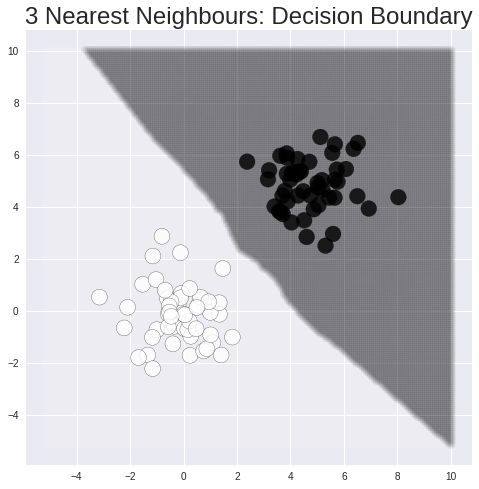

In [ ]:
plt.figure(figsize=(8,8)) 
current_axis = plt.gca() 
plt.grid(True) 
# model=KNN(3,distance_metric=EuclideanDistance)
draw_decision_boundary(model, current_axis) 
plt.scatter(X[:,0],X[:,1],marker='o',c=y, s=250, edgecolor='k',alpha=0.8)
plt.title("3 Nearest Neighbours: Decision Boundary",fontsize=24)
plt.show()

#Example 2: Complex decision boundary 

Following is an example of binary class dataset of two spirals. As it is clear that KNN leads to very smooth and equidistant decision boundary.


In [ ]:
def maketwospirals(num_points=1000,rotations =2, noise = .5):
  ''' 
  Parameters:
  num_points: Number of points to be generated per spiral
  rotations : How many times a spiral should rotate
  noise: noise factor 

  Returns
  -------
  coordinates and class vectors of the two spirals 


  ''' 
  n = np.sqrt(np.random.rand(num_points,1))*rotations * (2*np.pi)
  rx = -np.cos(n)*n + np.random.rand(num_points,1) * noise 
  ry =  np.sin(n)*n + np.random.rand(num_points,1)*noise

  return (np.concatenate((np.hstack((rx,ry)),
                          np.hstack((-rx,-ry))),
                         axis=0),
          np.concatenate((np.zeros(num_points),
                          np.ones(num_points)),
                         axis=0)) 
  

In [ ]:
X_spiral, y_spiral = maketwospirals()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'C' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Legend does not support 's' instances.
A proxy artist ma

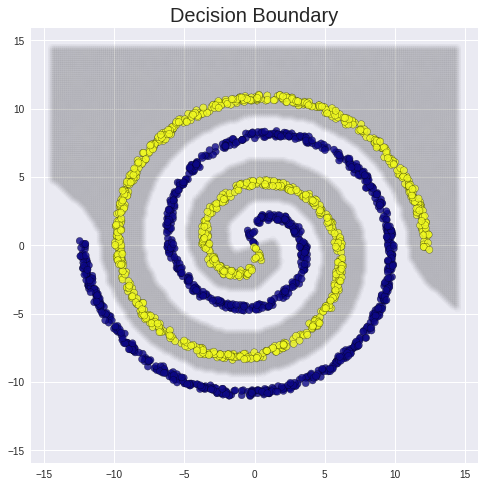

In [ ]:
plt.figure(figsize=(8,8)) 
model = KNN(3) 
model.fit(X_spiral, y_spiral) 
draw_decision_boundary(model,plt.gca(),opacity=0.02) 
plt.scatter(X_spiral[:,0],X_spiral[:,1], marker='o',c = y_spiral, s =50, edgecolor='k',alpha=0.8,cmap='plasma')
plt.title('Decision Boundary',fontsize=20)
plt.legend('Class 1','Class 2')
plt.show()


#KNN for Regression task 


In [ ]:
#to make this notebook's output stable across runs 
np.random.seed(42) 

#Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:
w1 = 3 
w0 = 4 
n = 100 

X = 2*np.random.rand(n,)

#Obtain y = 4 + 3*x + noise. Noise is randomly sampled

y = w0 + w1 *X + np.random.randn(n,) 


In [ ]:
X = X.reshape(-1,1) 
y = y.reshape(-1,1)

In [ ]:
print("Shape of the training data feature matrix:", X.shape) 
print("Shape of label vector:", y.shape)

Shape of the training data feature matrix: (100, 1)
Shape of label vector: (100, 1)


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42) 


In [ ]:
print("Shape of training feature matrix:", X_train.shape) 
print("Shape of training label vector:", y_train.shape) 
print("Shape of test feature matrix:",X_test.shape) 
print("Shape of test label matrix:",y_test.shape)

Shape of training feature matrix: (80, 1)
Shape of training label vector: (80, 1)
Shape of test feature matrix: (20, 1)
Shape of test label matrix: (20, 1)


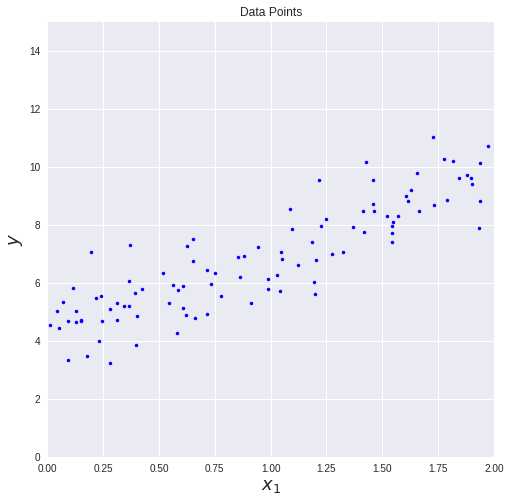

In [ ]:
plt.figure(figsize=(8,8)) 
plt.plot(X,y,'b.') 
plt.title("Data Points") 
plt.grid(True) 
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18, rotation=90)
plt.axis([0,2,0,15])
plt.show()

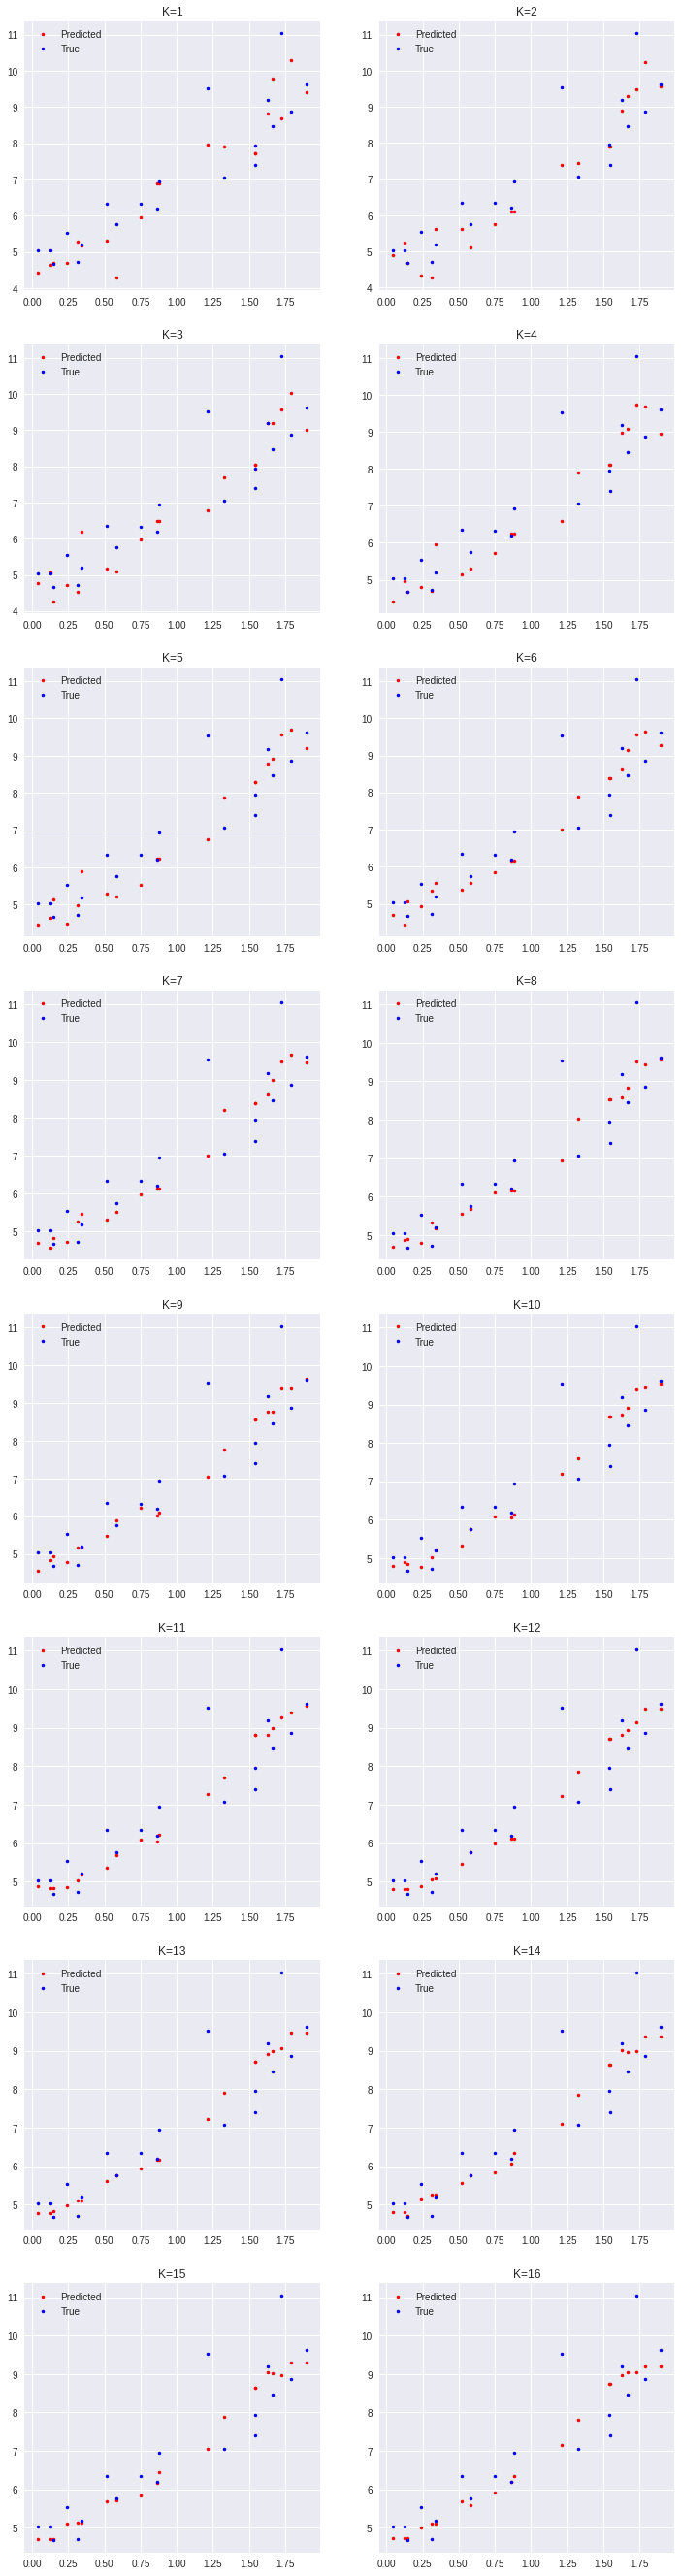

In [ ]:
error_lst =[]
plt.figure(figsize=(12,48))
for i in range(16):
  #create model object with special value of K
  model = KNN(i+1, task_type='Regression') 

  #fit the model 
  model.fit(X_train, y_train) 

  #create a vector to store the predictions 
  y_test_predicted = np.zeros_like(y_test) 

  # make predictions on test set 
  for j in range(X_test.shape[0]):
    #predict on jth sample from test set 
    y_test_predicted[j],_ = model.predict(X_test[j,:]) 
  
  error_lst.append(np.sum(np.power(y_test - y_test_predicted,2)))

  #Plot predictions 

  plt.subplot(8,2,i+1)
  plt.plot(X_test, y_test_predicted, 'r.') 

  plt.plot(X_test, y_test, 'b.') 
  plt.legend(['Predicted','True']) 

  plt.title(f'K={i+1}') 
plt.show()


  #make predictions on test set

Text(0, 0.5, 'Error')

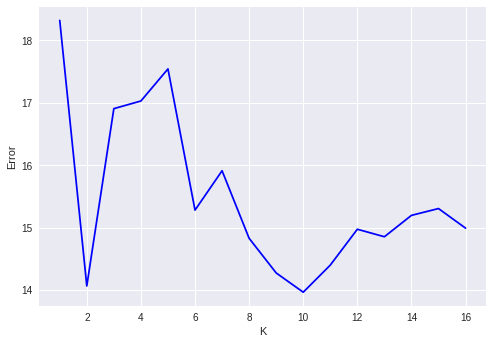

In [ ]:
plt.plot(np.arange(len(error_lst))+1,error_lst, 'b-') 
plt.xlabel('K') 
plt.ylabel('Error')

In [ ]:
np.zeros_like(1)

array(0)

In [ ]:
np.random.seed(0)
a = np.random.randint(0,100,15)
print(a)
# print(np.argsort(a))
np.argpartition(a,3)

[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58]


array([13,  5,  7,  8,  0,  4,  6,  1,  3,  9, 10, 11, 12,  2, 14])

In [ ]:
b=[44,47, 64, 67, 67,  9 ,83, 21, 36, 87, 70, 88, 88, 12, 58]
b.sort()
b

[9, 12, 21, 36, 44, 47, 58, 64, 67, 67, 70, 83, 87, 88, 88]